In [0]:
### Problem set 1: (MNist) Hand Written Digits Prediction using Keras, Tensorflow backend

In [0]:
import tensorflow as tf

# Loadning MNest Data Set
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test,y_test) = mnist.load_data()


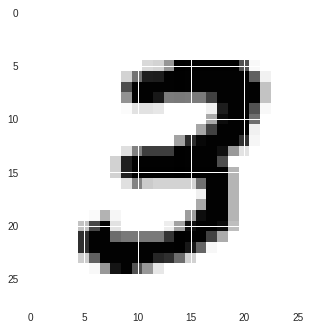

In [43]:
import matplotlib.pyplot as plt

# Ploting single sample data using Matplotlib
plt.imshow(x_train[7], cmap=plt.cm.binary)
plt.show()


In [44]:
# Normalizing Data using Keras Utils package
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


# Buildings Sequential Keras Model
model = tf.keras.models.Sequential()


# Adding Layers to Keras Model
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Compile Fit Keras Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.2623 - acc: 0.9229
Epoch 2/5
60000/60000 [==============================] - 8s 125us/step - loss: 0.1058 - acc: 0.9677
Epoch 3/5
60000/60000 [==============================] - 8s 140us/step - loss: 0.0732 - acc: 0.9765
Epoch 4/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.0541 - acc: 0.9823
Epoch 5/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.0407 - acc: 0.9869


In [45]:
# Evaluating the Model
loss, accuracy = model.evaluate(x_test, y_test)

print("loss: ", loss)
print("Accuracy: ", accuracy)


10000/10000 [==============================] - 0s 46us/step
loss:  0.09988657948668114
Accuracy:  0.971


In [46]:
# Hand Written Degit Prediction
pred = model.predict([x_test])
pred


array([[1.7617326e-10, 2.2635251e-10, 5.0792583e-08, ..., 9.9999952e-01,
        8.5066634e-11, 7.7085529e-09],
       [2.1677889e-11, 6.4156097e-06, 9.9999344e-01, ..., 2.3927573e-09,
        2.6936022e-09, 2.7899645e-15],
       [6.0202851e-08, 9.9996114e-01, 5.5905866e-07, ..., 2.4673989e-05,
        7.0243113e-06, 6.2553553e-08],
       ...,
       [1.4045161e-11, 4.0435160e-07, 5.4108706e-10, ..., 2.1051646e-06,
        1.9114812e-07, 1.6296472e-06],
       [4.4837549e-07, 1.6243723e-08, 5.0592965e-09, ..., 6.1220641e-07,
        2.3726744e-03, 1.9653573e-10],
       [4.2389758e-11, 6.9189383e-11, 8.4826139e-11, ..., 7.3469524e-13,
        1.7764762e-11, 8.9185102e-14]], dtype=float32)

In [47]:
# Printing Prediction using Numpy
import numpy as np

print(np.argmax(pred[20]))


9


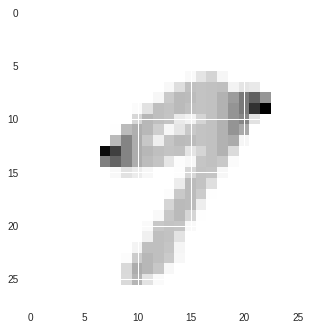

In [48]:
# Viewing the image
plt.imshow(x_test[20])
plt.show()


In [0]:
### Saving the Model
#from tensorflow.python.keras.models import save_model

#model.save('Deploy_model.model')

#new_model = tf.keras.models.load_model('Deploy_model.model')


In [0]:
### Problem set 2: Sentiment Analysis of (imdb) Movie Reviews using Deep Learning

In [0]:
from keras.datasets import imdb


# Importing the Data Set
(X_train, y_train), (X_test, y_test) = imdb.load_data()

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [51]:
# Binary classification problem
print(np.unique(y))

# Summarize number of words
print("Number of words: ", len(np.unique(np.hstack(X))))


[0 1]
Number of words:  88585


Review length: 
Mean 234.76 words (172.911495)


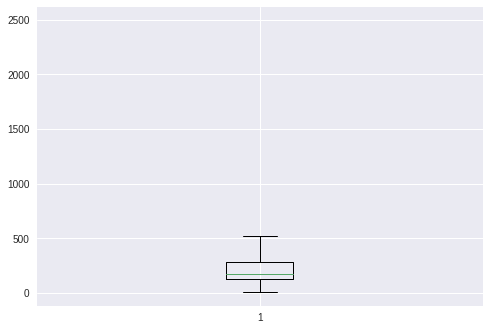

In [52]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]

print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

# plot review length
plt.boxplot(result)
plt.show()

#Average review is less then 300 words and standard deviation is greter than 200 words

In [0]:
### Multi-Layer Perceptron Model for the IMDB Dataset


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


In [54]:
# create the model
model = Sequential()

model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

# Final evaluation of the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Loss: ", loss)
print("Accuracy: ", accuracy)


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 30s - loss: 0.4941 - acc: 0.7320 - val_loss: 0.3019 - val_acc: 0.8704
Epoch 2/2
 - 29s - loss: 0.1825 - acc: 0.9314 - val_loss: 0.3078 - val_acc: 0.8714
Loss:  0.30782136394023896
Accuracy:  0.87136
